In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv")
print(df.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [25]:
df = df.drop(columns = ["Unnamed: 0"])
print(df.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


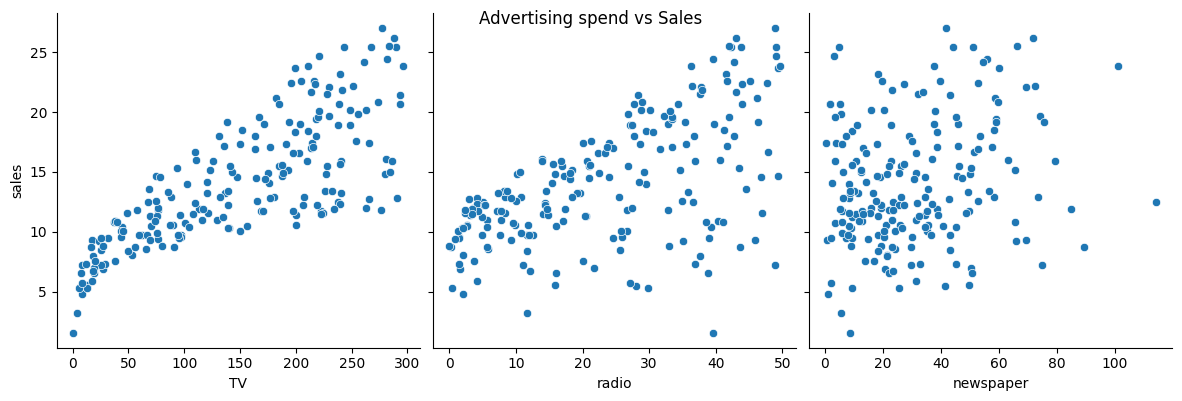

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], height = 4, aspect = 1, kind = 'scatter')
plt.suptitle("Advertising spend vs Sales")
plt.show()

In [35]:
import numpy as np

X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

y = y.reshape(-1,1)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

In [36]:
m = np.zeros((X.shape[1], 1))
b = 0
epochs = 1000
learning_rate = 0.01
n = len(X)

loss_history = []

for epoch in range(epochs):
    y_pred = X @ m + b
    error  = y - y_pred

    dm = (-2/n) * (X.T @ error)
    db = (-2/n) * np.sum(error)

    m = m -learning_rate * dm
    b = b - learning_rate * db

    loss = np.mean(error ** 2)
    loss_history.append(loss)

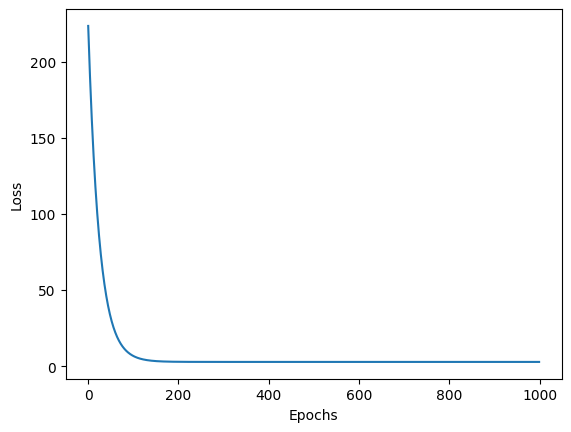

In [37]:
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [38]:
new_input = np.array([[150, 25, 10]])
new_input = (new_input - X_mean) / X_std
y_new = new_input @ m + b
print(f"Predicted sales for new input: {y_new[0][0]:.2f}")

Predicted sales for new input: 14.51


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [42]:
new_input = np.array([[150, 25, 10]])
new_input = (new_input - X_mean) / X_std

y_scikit = model.predict(new_input)
print(f"Predicted value using scikit_learn: {y_scikit[0][0]:.2f}")

Predicted value using scikit_learn: 14.51
